In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('new_cleaned_data.csv')
df

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000,Petrol
1,3,Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,28000,Petrol
2,4,EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,36000,Diesel
3,6,Figo,Ford,2012,175000.0,41000,Diesel
4,7,Eon,Hyundai,2013,190000.0,25000,Petrol
...,...,...,...,...,...,...,...
646,883,Suzuki Ritz VXI ABS,Maruti,2011,270000.0,50000,Petrol
647,885,Indica V2 DLE BS III,Tata,2009,110000.0,30000,Diesel
648,886,Corolla Altis,Toyota,2009,300000.0,132000,Petrol
649,888,Zest XM Diesel,Tata,2018,260000.0,27000,Diesel


In [2]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]                # removing unnamed column
df

,name,company,year,Price,kms_driven,fuel_type
0,Santro Xing XO eRLX Euro III,Hyundai,2007,80000.0,45000,Petrol
1,Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000.0,28000,Petrol
2,EcoSport Titanium 1.5L TDCi,Ford,2014,575000.0,36000,Diesel
3,Figo,Ford,2012,175000.0,41000,Diesel
4,Eon,Hyundai,2013,190000.0,25000,Petrol
...,...,...,...,...,...,...
646,Suzuki Ritz VXI ABS,Maruti,2011,270000.0,50000,Petrol
647,Indica V2 DLE BS III,Tata,2009,110000.0,30000,Diesel
648,Corolla Altis,Toyota,2009,300000.0,132000,Petrol
649,Zest XM Diesel,Tata,2018,260000.0,27000,Diesel


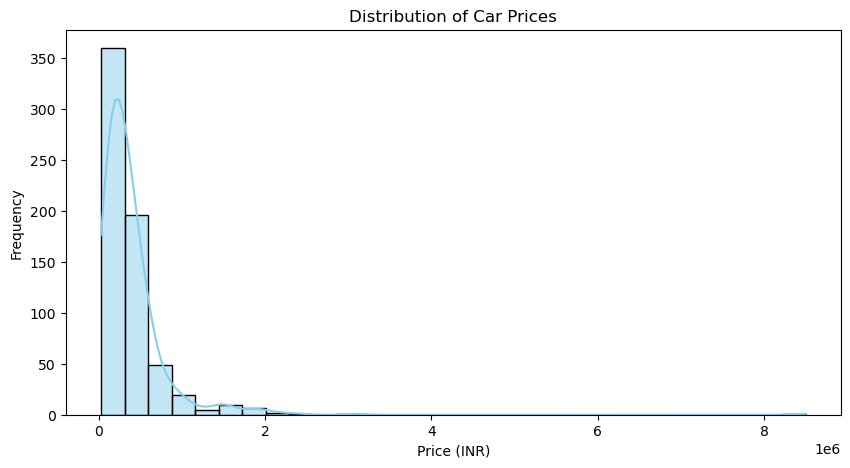

In [3]:
plt.figure(figsize=(10,5))
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.show()

Cars by Manufacturing Year

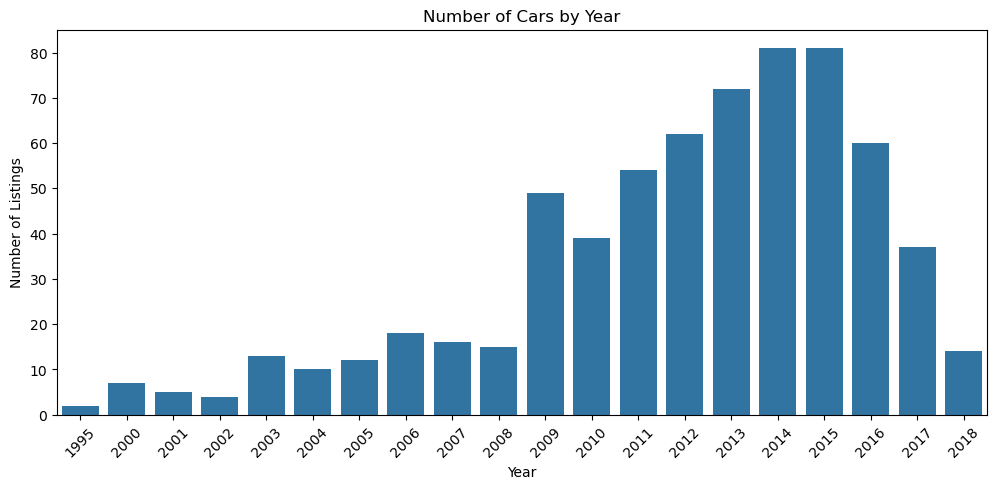

In [4]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='year', order=sorted(df['year'].unique()))
plt.xticks(rotation=45)
plt.title('Number of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Number of Listings')
plt.show()

KMs Driven vs. Price (Scatter Plot)

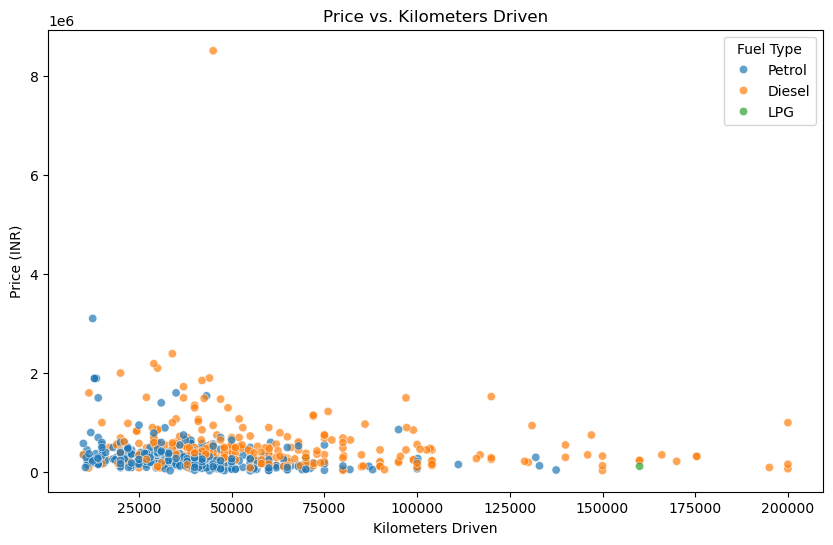

In [5]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='kms_driven', y='Price', hue='fuel_type', alpha=0.7)
plt.title('Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (INR)')
plt.legend(title='Fuel Type')
plt.show()

Top 10 Most Listed Car Brands

C:\Users\harshad\AppData\Local\Temp\ipykernel_18996\3764165367.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')


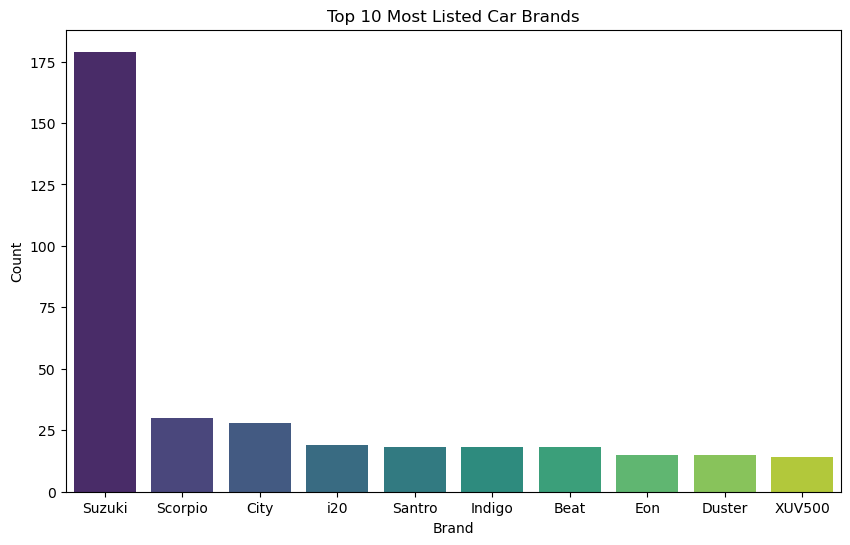

In [6]:
df['brand'] = df['name'].str.split().str[0]  # Extract brand

top_brands = df['brand'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')
plt.title('Top 10 Most Listed Car Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

 Price Comparison of Top Brands (Boxplot)

C:\Users\harshad\AppData\Local\Temp\ipykernel_18996\1779648467.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['brand'].isin(top5)], x='brand', y='Price', palette='pastel')


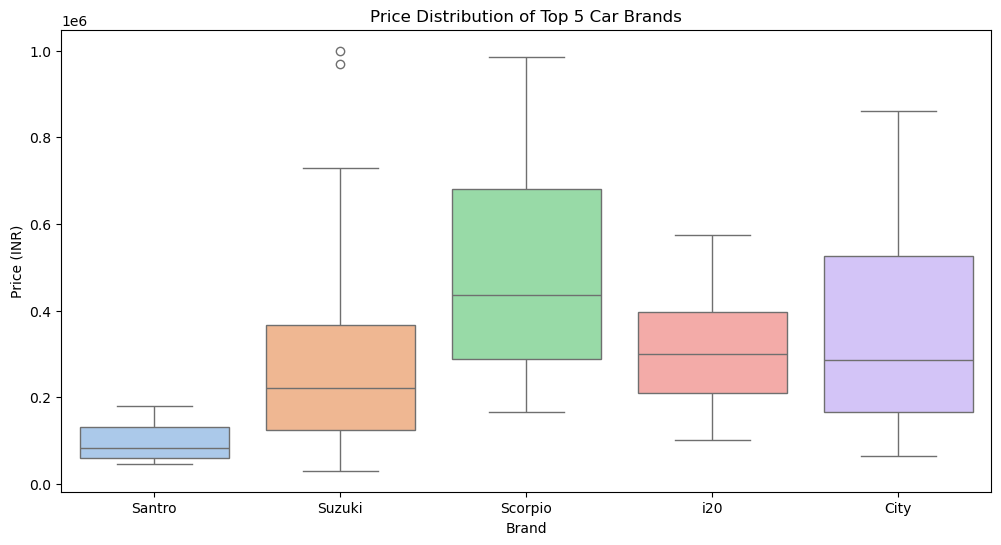

In [7]:
top5 = df['brand'].value_counts().head(5).index
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['brand'].isin(top5)], x='brand', y='Price', palette='pastel')
plt.title('Price Distribution of Top 5 Car Brands')
plt.xlabel('Brand')
plt.ylabel('Price (INR)')
plt.show()

Fuel Type Distribution

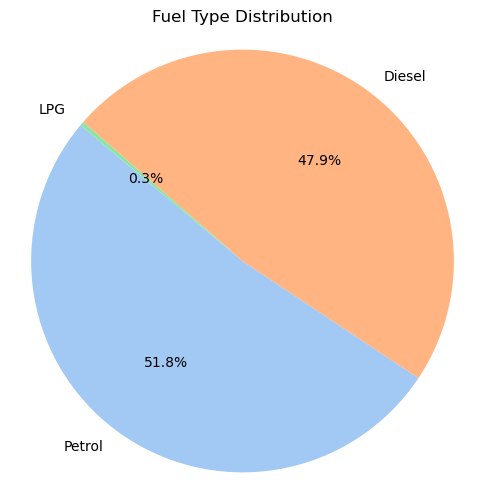

In [8]:
fuel_counts = df['fuel_type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Fuel Type Distribution')
plt.axis('equal')  # Equal aspect ratio
plt.show()

Average Price by Fuel Type

C:\Users\harshad\AppData\Local\Temp\ipykernel_18996\2166151948.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='fuel_type', y='Price', estimator='mean', palette='Accent')


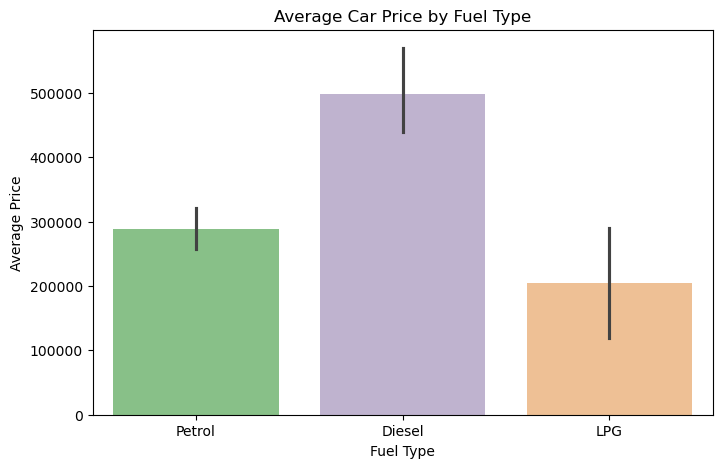

In [9]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='fuel_type', y='Price', estimator='mean', palette='Accent')
plt.title('Average Car Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()

Relationship Between Year and Price

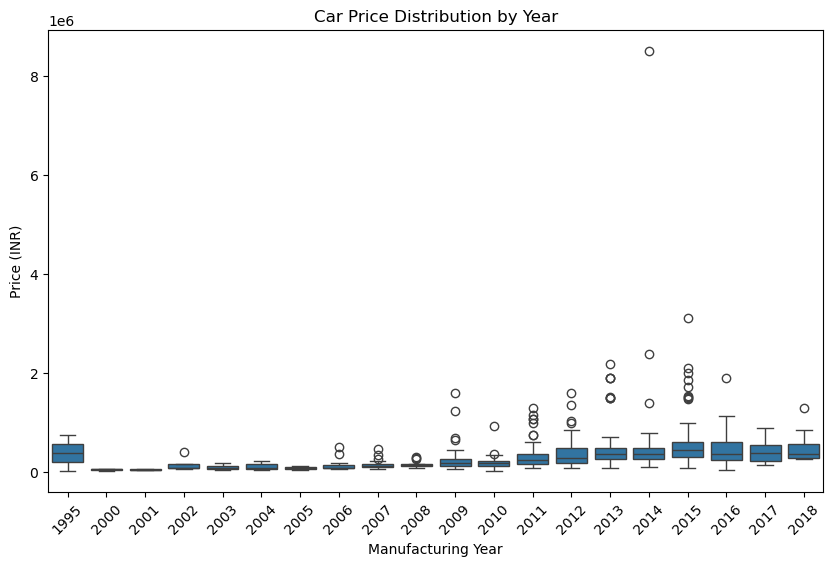

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='year', y='Price')
plt.xticks(rotation=45)
plt.title('Car Price Distribution by Year')
plt.xlabel('Manufacturing Year')
plt.ylabel('Price (INR)')
plt.show()

 Price Trend Over Years (Mean Price per Year)

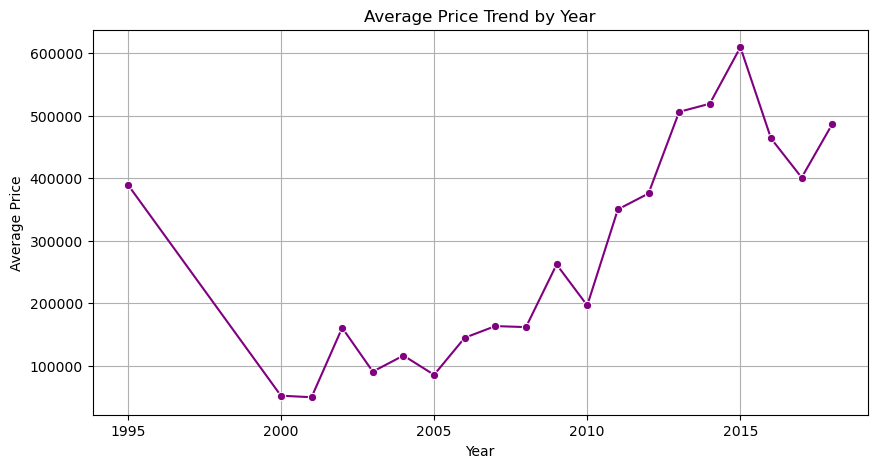

In [11]:
avg_price_by_year = df.groupby('year')['Price'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(data=avg_price_by_year, x='year', y='Price', marker='o', color='purple')
plt.title('Average Price Trend by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

Correlation Heatmap

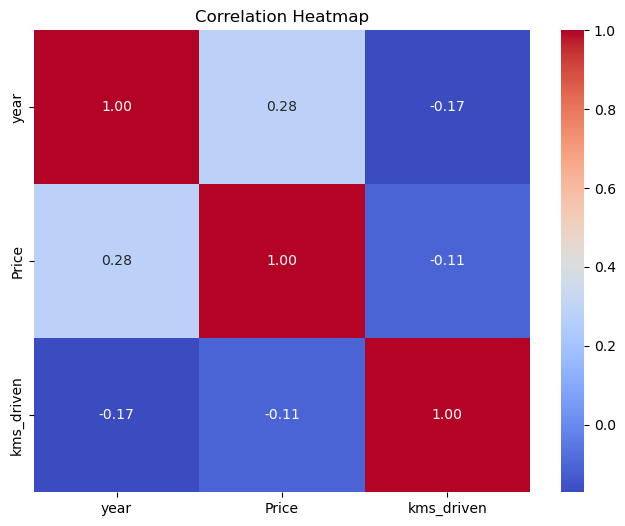

In [12]:
plt.figure(figsize=(8,6))
numeric_cols = df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()